In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [10]:
data = pd.read_csv('train.txt', delim_whitespace=True, header=None)


In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,49.647550,33.575370,12.120255,55.525019,59.667424,48.655833,27.841291,37.671693,29.372885,61.603557,...,49.545031,26.799100,37.478234,22.991726,40.375436,54.282751,55.377480,36.010305,39.601682,1.0
1,32.186724,49.303083,26.144157,50.185549,35.250637,50.152353,28.309090,49.861035,29.419526,54.928607,...,47.364147,37.204230,33.141586,43.289154,47.930928,56.223338,51.794596,37.535402,29.442770,0.0
2,50.527849,40.494637,38.048920,46.160760,42.192538,29.879857,51.837174,50.484946,33.463057,39.968752,...,43.277509,34.451938,41.501669,37.546376,67.145373,40.587152,35.052946,46.928596,68.199559,0.0
3,20.317886,50.551271,43.325413,46.714819,46.070661,25.204793,56.131786,39.509030,42.694093,43.844120,...,41.084533,36.651456,77.064527,23.138650,43.166518,27.196714,35.357738,52.509325,39.480603,0.0
4,42.786827,46.552778,29.977697,43.952371,78.084230,57.121656,28.070137,44.151037,96.274285,32.826287,...,24.354419,40.104489,33.004923,28.733771,33.756176,62.872634,38.268475,56.336674,37.689786,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,45.144444,23.455054,59.165270,58.870748,37.828947,46.197904,31.220951,19.750510,34.310324,47.530716,...,37.013224,25.148334,33.044309,46.174713,43.923713,57.344054,50.505656,41.796220,45.711453,0.0
1662,25.764977,54.358390,33.241198,44.707271,41.085282,42.685399,50.958397,61.667418,27.143179,29.851433,...,48.925340,55.391046,33.237688,37.509467,45.216049,41.964317,30.617238,71.009537,61.781565,1.0
1663,46.225286,57.852474,20.160533,59.192148,27.798815,30.228503,48.254692,22.312661,24.440230,38.240191,...,26.969233,49.766653,43.769517,36.359110,31.269858,33.721603,39.474587,56.860678,42.044680,1.0
1664,67.260014,26.574990,33.019673,38.552314,31.122328,39.369573,26.062286,66.022281,26.871273,37.860716,...,55.396821,40.311469,42.639655,49.648895,45.313200,37.665594,39.547350,21.285083,37.558859,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Columns: 101 entries, 0 to 100
dtypes: float64(101)
memory usage: 1.3 MB


In [13]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,...,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,41.789146,42.325431,41.438719,41.595017,42.218898,41.890934,42.462021,42.309844,39.030340,42.117886,...,42.115709,41.985450,42.215874,42.325745,41.993733,41.810917,42.295220,41.842071,42.456321,0.246098
std,13.107376,13.316249,12.754379,13.015599,12.735725,12.835232,12.852033,13.051811,25.997514,12.888691,...,12.943889,12.685114,12.830829,12.859235,12.772191,12.853493,12.688147,12.715008,13.041834,0.430866
min,7.720632,8.447803,8.030881,11.257383,6.120383,8.661367,10.287872,5.567145,2.813265,7.417020,...,7.607699,6.255753,7.976966,10.226728,5.300876,9.564166,11.623012,11.353162,12.568946,0.000000
25%,32.097752,32.650206,32.563633,32.161717,33.194281,32.941712,33.286164,32.905098,20.015015,32.915511,...,32.977426,33.091820,33.207884,33.181401,33.063673,32.519429,32.952884,32.899636,33.069174,0.000000
50%,41.011512,41.593260,40.467043,40.588947,41.168002,40.642343,41.565930,41.451075,28.432078,41.348286,...,41.169388,40.984127,41.284556,41.388562,40.920936,40.718556,41.031991,40.136468,41.467763,0.000000
75%,50.565659,50.615715,48.896903,49.891929,50.417334,50.087265,49.866782,50.145091,55.806528,50.394855,...,50.288072,50.874379,50.145743,50.728442,50.243671,50.392130,50.419924,49.967870,50.620327,0.000000
max,96.528338,91.814573,109.554790,86.923816,92.291748,102.448514,100.522577,92.073708,162.201222,106.786468,...,92.044823,83.643219,90.957290,88.882903,92.086958,90.799999,98.474723,97.609538,92.628484,1.000000


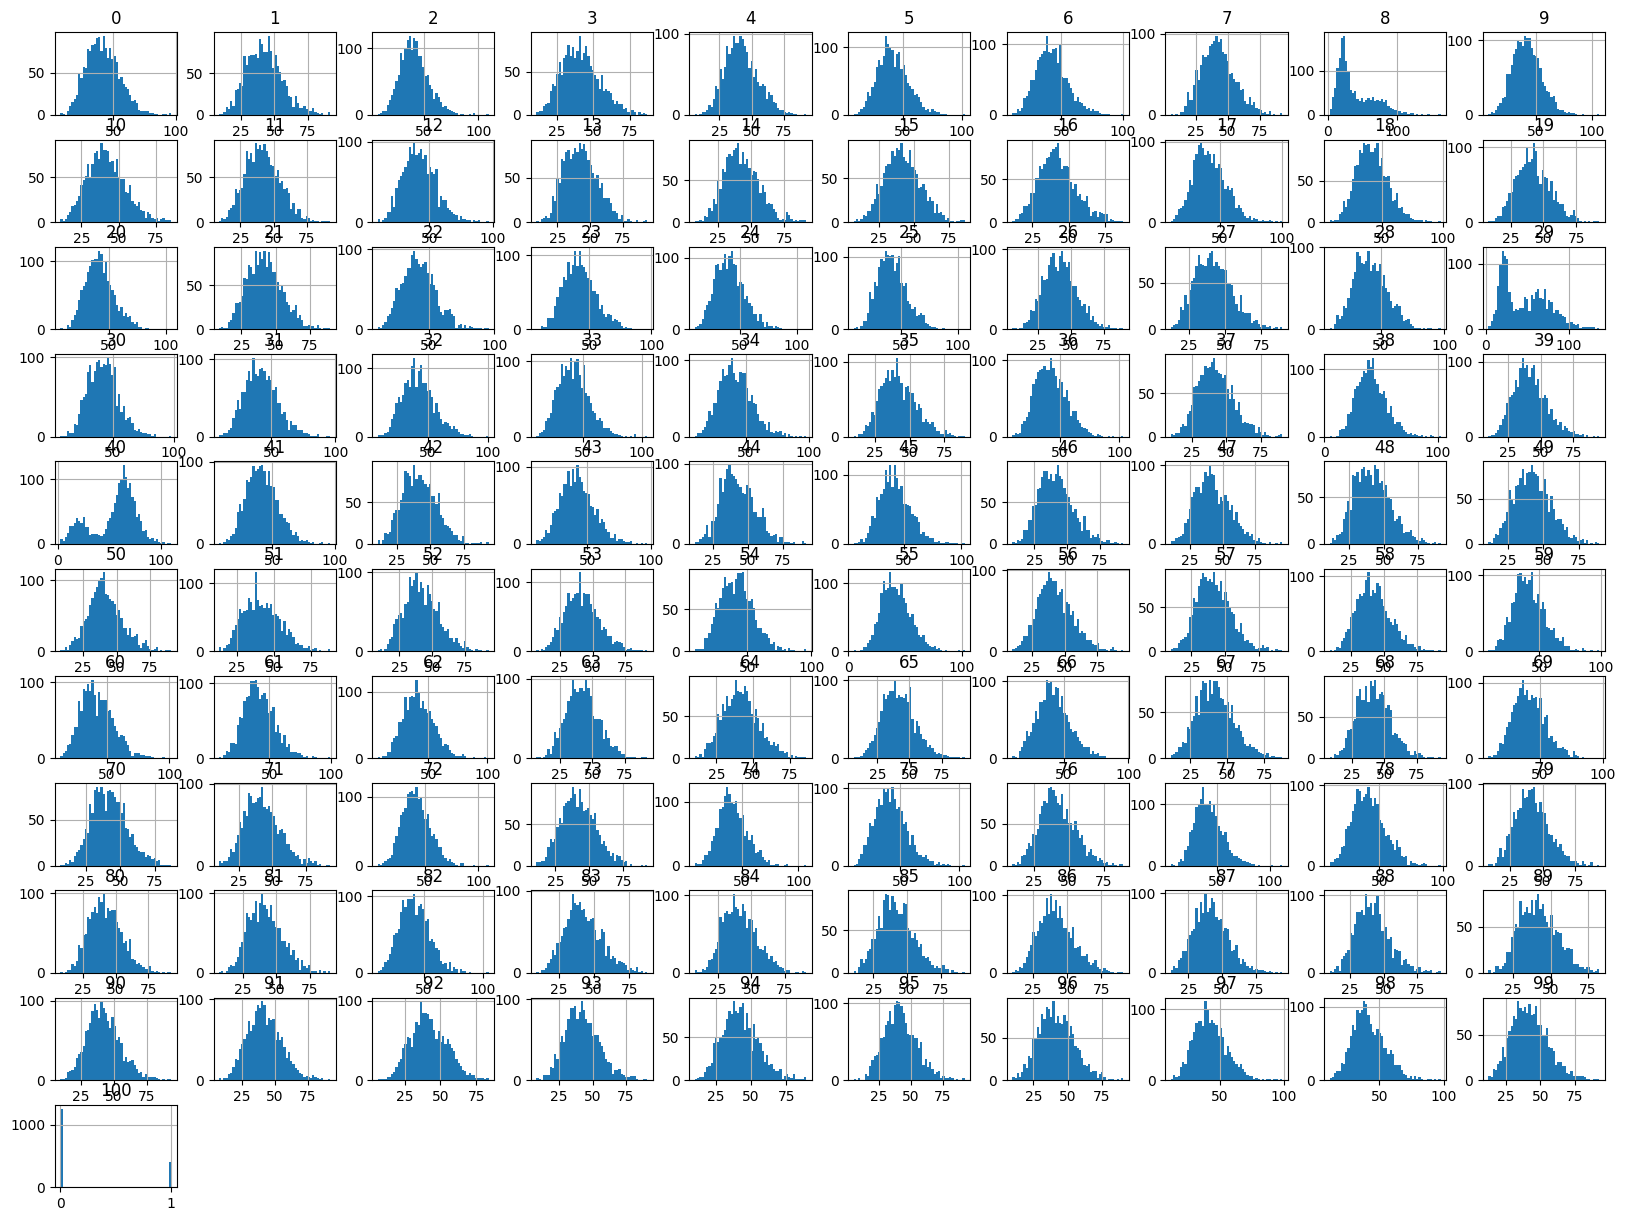

In [14]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
X= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,49.647550,33.575370,12.120255,55.525019,59.667424,48.655833,27.841291,37.671693,29.372885,61.603557,...,31.069362,49.545031,26.799100,37.478234,22.991726,40.375436,54.282751,55.377480,36.010305,39.601682
1,32.186724,49.303083,26.144157,50.185549,35.250637,50.152353,28.309090,49.861035,29.419526,54.928607,...,41.255210,47.364147,37.204230,33.141586,43.289154,47.930928,56.223338,51.794596,37.535402,29.442770
2,50.527849,40.494637,38.048920,46.160760,42.192538,29.879857,51.837174,50.484946,33.463057,39.968752,...,51.046738,43.277509,34.451938,41.501669,37.546376,67.145373,40.587152,35.052946,46.928596,68.199559
3,20.317886,50.551271,43.325413,46.714819,46.070661,25.204793,56.131786,39.509030,42.694093,43.844120,...,38.436187,41.084533,36.651456,77.064527,23.138650,43.166518,27.196714,35.357738,52.509325,39.480603
4,42.786827,46.552778,29.977697,43.952371,78.084230,57.121656,28.070137,44.151037,96.274285,32.826287,...,20.298445,24.354419,40.104489,33.004923,28.733771,33.756176,62.872634,38.268475,56.336674,37.689786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,45.144444,23.455054,59.165270,58.870748,37.828947,46.197904,31.220951,19.750510,34.310324,47.530716,...,44.261854,37.013224,25.148334,33.044309,46.174713,43.923713,57.344054,50.505656,41.796220,45.711453
1662,25.764977,54.358390,33.241198,44.707271,41.085282,42.685399,50.958397,61.667418,27.143179,29.851433,...,40.451044,48.925340,55.391046,33.237688,37.509467,45.216049,41.964317,30.617238,71.009537,61.781565
1663,46.225286,57.852474,20.160533,59.192148,27.798815,30.228503,48.254692,22.312661,24.440230,38.240191,...,40.188377,26.969233,49.766653,43.769517,36.359110,31.269858,33.721603,39.474587,56.860678,42.044680
1664,67.260014,26.574990,33.019673,38.552314,31.122328,39.369573,26.062286,66.022281,26.871273,37.860716,...,42.904807,55.396821,40.311469,42.639655,49.648895,45.313200,37.665594,39.547350,21.285083,37.558859


In [17]:
y

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1661    0.0
1662    1.0
1663    1.0
1664    0.0
1665    0.0
Name: 100, Length: 1666, dtype: float64

In [18]:
standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=29)

In [20]:
corr_matrix = data.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.000000,-0.011964,0.056092,-0.026527,0.024721,0.061133,0.004287,-0.028862,0.017619,-0.015706,...,-0.017078,-0.046820,-0.049033,0.002975,0.000635,-0.014741,0.041960,0.025785,-0.007822,0.024093
1,-0.011964,1.000000,0.013821,-0.009504,0.030120,0.004942,0.003041,-0.025055,0.014582,0.002579,...,0.009512,0.013079,-0.017045,0.018009,0.039058,-0.011979,-0.014950,0.048154,-0.018976,0.037893
2,0.056092,0.013821,1.000000,0.005366,0.017196,-0.010923,0.013396,-0.055385,-0.008092,-0.002922,...,-0.010938,0.017619,0.007252,-0.006897,-0.027628,0.022707,0.006434,0.007455,0.014700,0.015386
3,-0.026527,-0.009504,0.005366,1.000000,-0.038157,-0.006374,-0.017061,0.045635,0.034422,-0.009930,...,-0.011411,0.026756,0.015873,0.026239,0.003623,0.013903,-0.049102,0.007973,0.008778,-0.011941
4,0.024721,0.030120,0.017196,-0.038157,1.000000,-0.025742,0.023360,-0.017737,0.003611,0.023655,...,-0.009607,0.000444,-0.018155,0.021200,0.034232,-0.017236,-0.012319,-0.034587,0.012001,0.011628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.014741,-0.011979,0.022707,0.013903,-0.017236,0.006645,-0.009836,0.010131,0.016048,-0.006912,...,0.007273,-0.014908,-0.043799,-0.014507,-0.024749,1.000000,0.010779,-0.010518,-0.024073,-0.011885
97,0.041960,-0.014950,0.006434,-0.049102,-0.012319,0.002443,0.018110,0.023761,-0.007548,-0.000703,...,0.020656,-0.024526,-0.020104,0.036164,-0.004931,0.010779,1.000000,-0.047875,0.000092,-0.009115
98,0.025785,0.048154,0.007455,0.007973,-0.034587,0.015186,-0.005345,0.004988,-0.055282,0.001697,...,0.004856,0.010282,0.010786,0.019307,0.017068,-0.010518,-0.047875,1.000000,-0.011956,-0.011668
99,-0.007822,-0.018976,0.014700,0.008778,0.012001,-0.006907,-0.025619,0.008739,0.014753,-0.011729,...,-0.007574,0.007898,0.001940,-0.025141,-0.044476,-0.024073,0.000092,-0.011956,1.000000,0.024246


In [21]:
z=corr_matrix[100].sort_values(ascending=False)
z 

100    1.000000
66     0.074746
21     0.048333
35     0.043695
34     0.042972
         ...   
46    -0.045947
52    -0.046109
30    -0.053820
29    -0.240716
40    -0.841680
Name: 100, Length: 101, dtype: float64

In [22]:
zz=corr_matrix[100]
zz

0      0.024093
1      0.037893
2      0.015386
3     -0.011941
4      0.011628
         ...   
96    -0.011885
97    -0.009115
98    -0.011668
99     0.024246
100    1.000000
Name: 100, Length: 101, dtype: float64

In [23]:
zz.sort_values(ascending=False)

100    1.000000
66     0.074746
21     0.048333
35     0.043695
34     0.042972
         ...   
46    -0.045947
52    -0.046109
30    -0.053820
29    -0.240716
40    -0.841680
Name: 100, Length: 101, dtype: float64

In [113]:
w= abs(z).sort_values(ascending=False)
w

100    1.000000
40     0.841680
29     0.240716
66     0.074746
30     0.053820
         ...   
49     0.001088
93     0.001057
70     0.001024
64     0.000851
10     0.000710
Name: 100, Length: 101, dtype: float64

In [114]:
v= w[1:11]
v

40    0.841680
29    0.240716
66    0.074746
30    0.053820
21    0.048333
52    0.046109
46    0.045947
53    0.043747
35    0.043695
34    0.042972
Name: 100, dtype: float64

In [115]:
data[100]

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1661    0.0
1662    1.0
1663    1.0
1664    0.0
1665    0.0
Name: 100, Length: 1666, dtype: float64

KeyError: "None of [Index([34.732080419710115,  69.19260740067094,  61.26741201187044,\n        63.62648778119626,  48.44951710895796,  68.93567457376683,\n        66.39421845017687,  10.61206190240944,  66.21299018561638,\n        52.92248110210536,\n       ...\n        55.95037803864131,  21.49750089323118,  95.46547751311068,\n       19.353439187945792, 13.662200824574493,  82.04486207877228,\n       12.842719371748196,  19.22843665438696,  69.17033855368965,\n         59.4008361096272],\n      dtype='float64', length=1666)] are in the [columns]"

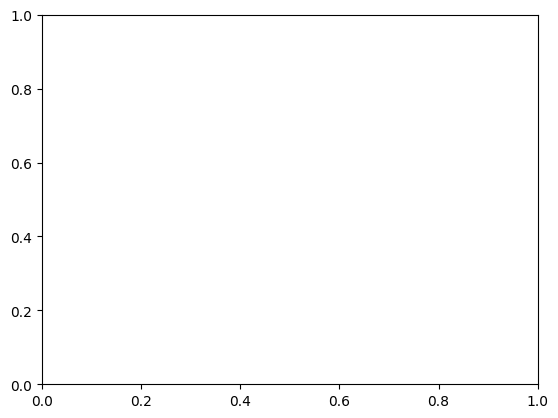

In [116]:
data.plot(kind="scatter", x=data[40], y=data[100],alpha=0.1)

In [117]:
xx=data[40]
ww=data[66]
yy=data[100]

In [118]:
import matplotlib.pyplot as plt

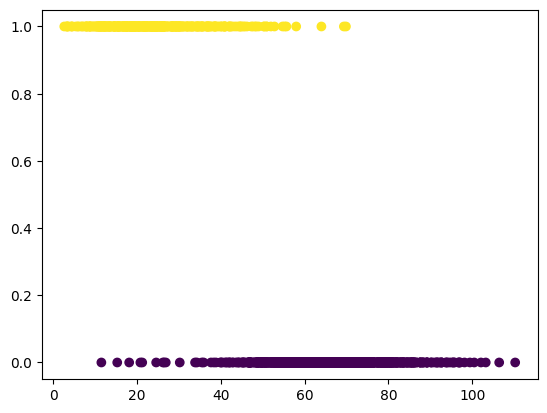

In [119]:
plt.scatter(xx,yy,c=y)

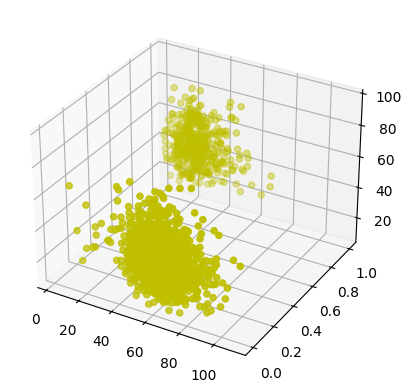

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, ww, c='y', marker='o', label='Data Points')

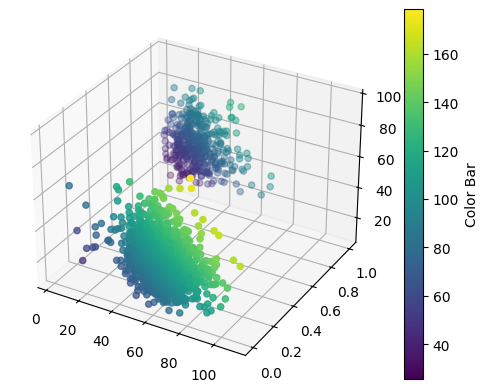

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on x, y, and z values
scatter = ax.scatter(xx, yy, ww, c=xx + yy + ww, cmap='viridis', marker='o', label='Data Points')
cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Color Bar')

# Display the plot
plt.show()

In [122]:
# Second classifier: DecisionTree:
# Create and train the Decision Tree classifier:
dtc = DecisionTreeClassifier(max_depth=5, random_state=29)
dtc.fit(X_train, y_train)

# Make predictions on the test data:
y_pred = dtc.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.9670658682634731
Precision: [0.97286822 0.94736842]
Recall: [0.98431373 0.91139241]


In [123]:
# Third classifier: KNN:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8083832335329342
Precision: [0.82154882 0.7027027 ]
Recall: [0.95686275 0.32911392]


In [124]:
# Fifth classifier: RandomForestClassifier
# Create and train the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=19)
rfc.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9700598802395209
Precision: [0.96577947 0.98591549]
Recall: [0.99607843 0.88607595]


In [125]:
#cross validation

In [126]:
# Reload both our training and validation sets:
traindata = pd.read_csv('train.txt', delim_whitespace=True, header=None)
testdata = pd.read_csv('test.txt', delim_whitespace=True, header=None)

# Separate features and targets from our newly initiated train dataset
X = traindata.iloc[:,:-1]
y = traindata.iloc[:,-1]

# Set our test dataset as Xval (for validation):
Xval = testdata
Xval
#standardscaler = StandardScaler()
#Xval1 = standardscaler.fit_transform(Xval)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,67.532159,27.731376,39.251892,38.847742,27.444017,40.766848,34.124596,42.604356,104.264916,41.535360,...,44.779376,32.552436,41.562297,34.674226,44.147026,42.471812,60.286269,43.578312,28.484518,62.472341
1,28.977395,40.189251,33.462457,17.838461,31.561467,26.740177,41.902288,45.885820,74.575724,28.243221,...,26.944726,49.902847,60.077759,34.706153,27.398259,48.042625,72.468174,53.860825,45.846769,31.721089
2,46.624061,50.360163,38.967485,40.450106,27.036105,36.955555,39.620136,36.681360,34.110634,37.170874,...,18.440676,54.836133,44.192352,48.881900,40.156937,44.278411,52.549050,42.525129,35.907931,39.841289
3,50.723431,51.741263,43.567504,54.176084,34.551600,39.200610,26.667873,36.334550,76.169354,30.594623,...,20.279416,63.175172,68.237580,32.330376,44.549639,18.737729,43.181844,19.280648,54.273226,34.499360
4,32.299652,50.747698,31.228594,51.732780,48.536642,53.904399,48.649174,45.293689,57.520427,48.531091,...,28.612976,66.352334,56.222870,49.512881,31.912284,41.925129,28.016048,28.069859,24.041110,57.549013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,71.936936,41.097933,55.595958,56.658885,49.168158,47.451775,45.895224,45.768027,110.059912,23.032198,...,37.738997,23.617924,34.272555,60.285870,25.914097,25.590448,26.625356,44.117905,49.272194,26.505068
1662,72.330683,45.704169,38.507550,39.869736,63.767710,59.780960,58.177963,25.293670,61.140980,55.894727,...,30.427219,35.283023,49.125894,58.708979,63.564646,39.716933,16.705311,29.937013,31.155190,66.340578
1663,40.256947,55.390803,44.363922,70.664265,49.045556,55.799261,18.407297,34.228335,29.051115,66.550251,...,24.392208,39.481382,24.067339,35.891029,31.583324,45.869668,44.549080,33.881581,18.373179,35.577928
1664,24.640795,49.801326,39.419148,44.871135,39.994184,51.134880,53.529364,38.542853,14.175885,67.112685,...,15.746074,39.452888,45.267836,77.247714,35.119237,18.085401,35.886824,42.377691,77.782555,56.132496


In [127]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X, y)

# Make predictions on the test data:
y_pred_val = knn1.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)

Accuracy: 0.6620648259303722
Precision: [0.75018051 0.22775801]
Recall: [0.8272293  0.15609756]
AUC: 0.4916634301693335


In [128]:
rfc1 = RandomForestClassifier(n_estimators=100, random_state=19)
rfc1.fit(X, y)

# Make predictions on the test data:
y_pred_val1 = rfc1.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)

Accuracy: 0.6620648259303722
Precision: [0.75018051 0.22775801]
Recall: [0.8272293  0.15609756]
AUC: 0.4916634301693335


In [129]:
dtc1 = DecisionTreeClassifier(max_depth=5, random_state=29)
dtc1.fit(X, y)

# Make predictions on the test data:
y_pred_val = dtc1.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)

Accuracy: 0.6134453781512605
Precision: [0.74637681 0.2240566 ]
Recall: [0.73805732 0.23170732]
AUC: 0.4848823209569675


In [131]:
# Write our predictions to a text file:
with open('predicted_values.txt', 'w') as f:
    for pred in y_pred_val1:
        f.write(f'{int(pred)}\n')

In [4]:
testdata1 = pd.read_csv('test.txt', delim_whitespace=True, header=None)

In [5]:
testdata1.shape

(1666, 100)

In [6]:
testdata1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,67.532159,27.731376,39.251892,38.847742,27.444017,40.766848,34.124596,42.604356,104.264916,41.535360,...,44.779376,32.552436,41.562297,34.674226,44.147026,42.471812,60.286269,43.578312,28.484518,62.472341
1,28.977395,40.189251,33.462457,17.838461,31.561467,26.740177,41.902288,45.885820,74.575724,28.243221,...,26.944726,49.902847,60.077759,34.706153,27.398259,48.042625,72.468174,53.860825,45.846769,31.721089
2,46.624061,50.360163,38.967485,40.450106,27.036105,36.955555,39.620136,36.681360,34.110634,37.170874,...,18.440676,54.836133,44.192352,48.881900,40.156937,44.278411,52.549050,42.525129,35.907931,39.841289
3,50.723431,51.741263,43.567504,54.176084,34.551600,39.200610,26.667873,36.334550,76.169354,30.594623,...,20.279416,63.175172,68.237580,32.330376,44.549639,18.737729,43.181844,19.280648,54.273226,34.499360
4,32.299652,50.747698,31.228594,51.732780,48.536642,53.904399,48.649174,45.293689,57.520427,48.531091,...,28.612976,66.352334,56.222870,49.512881,31.912284,41.925129,28.016048,28.069859,24.041110,57.549013
